<div style="text-align: center;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">An&aacute;lisis Num&eacute;rico para Ingenier&iacute;a - I Semestre 2020</span></strong></h1>

<h1 style="text-align: center;"><span style="color: #0000ff;">TAREA 2</span></h1>

<p><strong>Descripci&oacute;n:&nbsp;</strong>Este documento presenta la resolucion de la tarea 2 del curso Analisis Numerico para Ingenieria.</p>

<p><strong>Integrantes</strong><ul>
<li>Kenneth Jeanpol Alvarado Mendez 2015095715</li>
</ul>.</p>


<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong></strong>Parte 1: Método de Newton-Raphson</span></span></h2>

<h3><strong>a) Problema a Resolver </strong></h3>


<h4>Dar solución a un sistema de m ecuaciones no lineales con m incógnitas. El problema se puede representar matemáticamente como :</h4>

$$ F(x)=0_{m} $$
donde  $0_{m}=(0,0,....,0)^{T} \in \mathbb{R}^{m}$

$$\begin{equation}
F(x)=\begin{pmatrix}
f_{1}(x_{1},x_{2},.....,x_{m}) \\
f_{2}(x_{1},x_{2},.....,x_{m})  \\
                                .\\
                                 .\\
f_{m}(x_{1},x_{2},.....,x_{m})\end{pmatrix}
\end{equation}$$


y cada  $f_{i}(x_{1},x_{2},.....,x_{m}):\mathbb{R}^{m}\rightarrow \mathbb{R}$ es una función no lineal
    


<h3><strong>b) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$\left\{\begin{matrix}
x_{k+1} & = & x_{k}-[J_{f}(x_{k})]^{-1}f(x_{k})\\ 
x_{0} \in \mathbb{R}^{n} &  &\text{Vector inicial}
\end{matrix}\right.$

Donde $J_{f}(x_{k})$ es invertible para todo $k=0,1,2,....$


<h3><strong>c) Valores Iniciales</strong></h3>

$x_{0} \in \mathbb{R}^{n}=$ Vector inicial para empezar las iteraciones que satisfacen $ F(x)=0_{m} $

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-success">
<h2 style="text-align: center;">Método de Newton-Raphson</h2>
    
    
<h4 style="padding-left: 30px;">Entradas:</h4>
    
<p>
        <li>$f$= sistemas de ecuaciones no lineales</li>
        <li>vars= variables de las cuales son dependientes el sistema de ecuaciones</li>
        <li>x_{0}= vector inicial de soluciones para empezar las iteraciones del método</li>
        <li>tol= tolerancia minima aceptada para el vector de soluciones</li>
        <li>maxIter= Cantidad maxima de iteraciones a realizar para encontrar el vector de soluciones</li>
</p>
    
    
<h4 style="padding-left: 30px;">Pseudoc&oacute;digo:</h4>
<ul>
    <li>Encontrar el jacobiano de $f$ como $Jf$
    <li>Definir $x_{k}=x_{0}$
    <li>Definir el error como $error=tol+1$
    <li>Definir la iteracion como $k=t0$
<ul>
    

</ul>
</li><li> Mientras el $error>tol $ y $iteracion < maxIter$
<ul>
    
<li> Jf_xk = $Jf(x_{k})$</li>
<li>  f_xk = $f(x_{k})$</li>
<li>  $y_{k}$= encontrar la solución de la ecuación " Jf_xk$* y = $ f_xk "</li>
<li>  $x_{k}$ = $x_{k} $ -  $y_{k}$ </li>   
    
     
<li>k = k+1</li>    
<li>error = $\begin{Vmatrix}
f(x_{k})
\end{Vmatrix}$</li>
    

</ul>
</li>
<li>fin</li>
</ul>
</div>


<h3><strong>e) Método linsolve</strong></h3>

<div class="alert alert-block alert-success">
<h4>En GNU Octave, el metodo linsolve es utilizado para resolver sistemas de ecuaciones</h4>

<h4>X = linsolve(A,B) resuelve el sistema lineal AX = B usando uno de los siguientes métodos:</h4>
 
<p>
        <li>Cuando A es cuadrado, linsolve usa la factorización LU con pivote parcial.</li>
        <li>Para todos los demás casos, linsolve utiliza la factorización QR con pivote de columna.</li>
</p>
</div>

![](gradiente.JPG)

<h3><strong>f) C&oacute;digo en GNU Octave</strong></h3>

In [2]:
warning('off')
function [xk,k,err] = newton_raphson_nl(f,vars,x0,tol,maxIter)
  syms x y z
  xk=x0';
  Jf=jacobian(f,vars);
  k=0;
  err=tol+1;
  iteraciones=[0];
  error=[err];
  while(k<maxIter&& err>tol)
    Jf_xk=subs(Jf, vars, xk);
    f_xk=(subs(f, vars, xk))';
    xk= xk-linsolve(double(Jf_xk), double(f_xk));
    k=k+1;
    f_xk=double(subs(f, vars, xk));
    err=double(norm(f_xk));
    iteraciones=[iteraciones k];
    error=[error err];
  endwhile
  plot(iteraciones,error,'b--o')
endfunction

<h3><strong>g) Problema a Resolver</strong></h3>

Use la iteración de Newton para aproximar la solución del sistema no lineal

$\left\{\begin{matrix}
cos(x_{2})-cos(x_{1}) &= & 0 \\ 
x_{3}^{x_{1}} &= & \frac{1}{x_{2}} \\ 
 e^{x_{1}}-x_{3}^{2}&= & 0
\end{matrix}\right.$

Utilice $x_0=(0.5,0.5,0.5)^{t}$ , $tol= 10^{-5}$ , $iterMax=1000$

xk =

   0.75309
   0.75309
   1.45724

k =  5
err =  0.0000013083


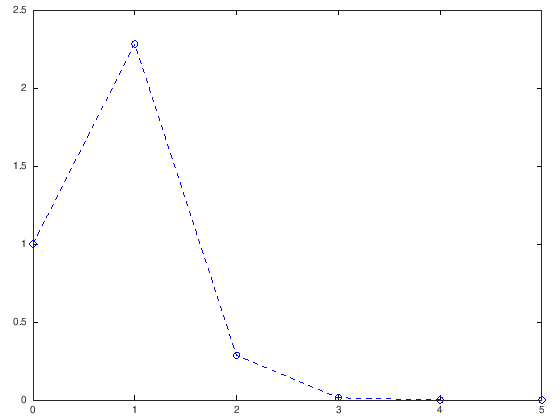

In [4]:
pkg load symbolic
syms x y z
f=[cos(y)-cos(x),(z**x)-(1/y),exp(x)-(z**2)];
vars=[x,y,z];
x0=[0.5 0.5 0.5];
tol=0.00001;
maxIter=1000;
[xk,k,err]=newton_raphson_nl(f,vars,x0,tol,maxIter)

<h3><strong>h) Análisis de Resultados </strong></h3>

<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong></strong>Parte 2: Método de Newton-Raphson</span></span></h2>

<h3><strong>a) C&oacute;digo en GNU Octave</strong></h3>

In [17]:
warning('off')
pkg load symbolic
function [x_k,itera] = metodo_1(F,vars,x_0,tol) 
    w=[];
    x=[];
    y=[];
    z=[];
    error=[];
    a=1;
    b=-2;
    itera=0;
    iteraciones=[];
    ep=tol+1;
    JF= jacobian(F,vars);

    while(ep>tol)
        Jx_kF = linsolve(double(Fx(JF,vars,x_0)), double(-Fx(F, vars, x_0))');

        y_k=x_0 + (1/2)*(Jx_kF');

        JF_sol = linsolve(double(Fx(JF,vars,y_k)), double(-Fx(F, vars, x_0))');

        z_k = x_0 + JF_sol';

        M = double(a * Fx(JF,vars,x_0) + b *  Fx(JF,vars,y_k));

        Fz= double(Fx(F,vars,z_k));

        M_solve = linsolve(M,-Fz');

        x_k = z_k + M_solve';

        x_0=x_k;

        itera = itera+ 1;
        iteraciones=[iteraciones itera];
        w=[w x_0(1)];
        x=[x x_0(2)];
        y=[y x_0(3)];
        z=[z x_0(4)];
        error=[error ep];
        ep=double(norm(Fx(F,vars,x_0)));
    endwhile
    plot(iteraciones,error,'b--o') 
     
endfunction

function F = Fx(f,vars,x_0) 
    F=subs(f, vars, x_0);     
endfunction

<h3><strong>b) Problema a Resolver</strong></h3>

x_k =

   0.50000   4.00000   3.00000   1.00000

itera =  4


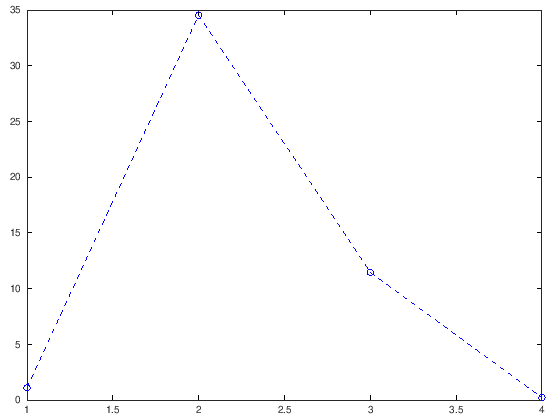

In [18]:
pkg load symbolic
syms x y z w
f=[(w**2)+x-(3*y)+(4*z)+(3/4),(3*w**2)+x-(y**2)+(z**2)+(13/4),(5*w)+(3*x**2)+y-(4*z**2)-(99/2),(8*w**2)-(14*x)+(6*y**2)-(7*z**2)+7];
vars=[w,x,y,z];
x0=[2 1 2 1];
tol=0.1;
[x_k,itera]=metodo_1(f,vars,x0,tol)